In [2]:
# importing everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import time
import sys
import glob

In [4]:
data = pd.read_csv("./files_for_lab/csv_files/marketing_customer_analysis.csv")

In [5]:
# shape of the dataframe
data.shape

(10910, 26)

In [5]:
data.shape

(10910, 26)

In [6]:
# dropping the weird column
try:
    data = data.drop(["Unnamed: 0"], axis = 1)
except:
    pass

In [7]:
# adding space between words in column name
data = data.rename(columns={'EmploymentStatus':'Employment Status'})

In [8]:
# lowercase for all column headers
cols = []
for i in data.columns:
    cols.append(i.lower())
data.columns = cols

In [10]:
# in case we wanna display the dataframe with all the columns
pd.set_option('display.max_columns', None)

In [11]:
# displaying only columns with numerical values
display(data.select_dtypes(np.number).columns)
print("Total column(s) with numerical values:",len(data.select_dtypes(np.number).columns))

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

Total column(s) with numerical values: 8


In [14]:
# displaying only columns with categorical values
display(data.select_dtypes(object).columns)
print("Total column(s) with categorical values:",len(data.select_dtypes(object).columns))

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employment status', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

Total column(s) with categorical values: 17


In [15]:
# counting nan
data.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [16]:
# displaying percentage of the nan values in the dataframe format, bcs its cool
nulls = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls = nulls.reset_index()
nulls.columns = ['header_name', 'nulls_in_%']
display(nulls)

,header_name,nulls_in_%
0,customer,0.00
1,state,5.78
2,customer lifetime value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employment status,0.00
8,gender,0.00
9,income,0.00


In [17]:
# looking for duplicates
duplicate = data[data.duplicated()]
print(len(duplicate))
# dropping duplicates, then check again to make sure
data = data.drop_duplicates()
duplicate = data[data.duplicated()]
display(duplicate)
print(len(duplicate))

37


,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type


0


In [18]:
# checking whether the nan are in the same row: response and state
# prints False if the rows dont match. prints nothing if the rows match

#saving index of the nan values to a variable
# the variables will then be matched
na_response = data[data['response'].isnull()].index.tolist()
na_state = data[data['state'].isnull()].index.tolist()
for i in range(len(na_state)):
    if na_response[i] != na_state[i]:
        print(False)

In [19]:
# just counting unique values to find the mode, if theres any
display(data["response"].value_counts(dropna=False))
display(data["state"].value_counts(dropna=False))

No     8795
Yes    1464
NaN     614
Name: response, dtype: int64

California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
NaN            614
Name: state, dtype: int64

In [20]:
# replacing nan values with mode, because adding around 5% to the mode value wont change much
data['state'] = data['state'].fillna("California")
display(data['state'].value_counts(dropna = False))
data['response'] = data['response'].fillna("No")
display(data['response'].value_counts(dropna = False))

California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: state, dtype: int64

No     9409
Yes    1464
Name: response, dtype: int64

In [21]:

# in case we want to just delete the rows. but this time i feel like keeping them. see reason above.
# data = data.drop(labels = data[data['response'].isnull()].index.tolist(), axis = 0)

In [22]:
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           623
months since policy inception       0
number of open complaints         623
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [23]:
# checking whether the nan are in the same row
# prints False if the rows dont match. prints nothing if the rows match

#saving index of the nan values to a variable
# the variables will then be matched
na_claim = data[data['months since last claim'].isnull()].index.tolist()
na_complaints = data[data['number of open complaints'].isnull()].index.tolist()
for i in range(len(na_claim)):
    if na_claim[i] != na_complaints[i]:
        print(False)

In [24]:
# quick numerical analysis
display(data[["months since last claim","number of open complaints"]].describe())
display(data[["months since last claim","number of open complaints"]].mode())

,months since last claim,number of open complaints
count,10250.000000,10250.000000
mean,15.145073,0.383512
std,10.078893,0.911190
min,0.000000,0.000000
25%,6.000000,0.000000
50%,14.000000,0.000000
75%,23.000000,0.000000
max,35.000000,5.000000


,months since last claim,number of open complaints
0,3.0,0.0


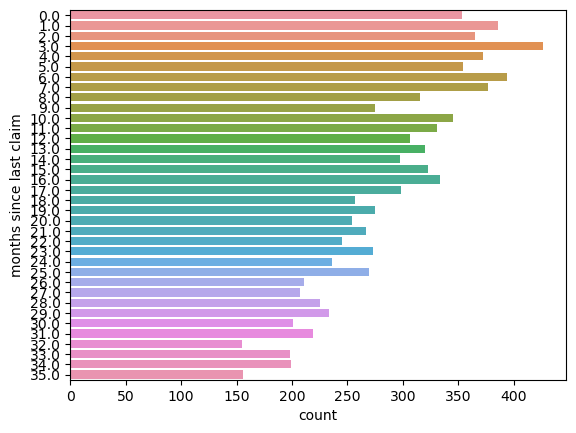

In [25]:
# checking the data distribution of the columns above
sns.countplot(y = data["months since last claim"])
plt.show()

In [26]:
# getting mean
mean_claim = data["months since last claim"].mean(skipna=True)
# getting median
median_complaints = data["months since last claim"].median(skipna=True)

In [27]:
# replacing nan values with mean, because the data looks evenly distributed
data['months since last claim'] = data['months since last claim'].fillna(mean_claim)
data['number of open complaints'] = data['number of open complaints'].fillna(median_complaints)

In [28]:
# check again
data.isna().sum()


customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [29]:
# checking whether the nan are in the same row
# prints False if the rows dont match. prints nothing if the rows match

#saving index of the nan values to a variable
# the variables will then be matched
na_vclass = data[data['vehicle class'].isnull()].index.tolist()
na_vsize = data[data['vehicle size'].isnull()].index.tolist()
for i in range(len(na_vclass)):
    if na_vclass[i] != na_vsize[i]:
        print(False)

In [30]:
# identifying the values (and the nan)
display(data["vehicle class"].value_counts(dropna=False))
display(data["vehicle size"].value_counts(dropna=False))

Four-Door Car    5200
Two-Door Car     2112
SUV              2009
NaN               608
Sports Car        548
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

Medsize    7233
Small      1962
Large      1070
NaN         608
Name: vehicle size, dtype: int64

In [31]:
# replacing the nan values with mode, because mode(s) in both columns are significantly dominant
data['vehicle class'] = data['vehicle class'].fillna("Four-Door Car")
data['vehicle size'] = data['vehicle size'].fillna("Medsize")

In [32]:
# replacing the nan values with mode, because mode(s) in both columns are significantly dominant
data['vehicle class'] = data['vehicle class'].fillna("Four-Door Car")
data['vehicle size'] = data['vehicle size'].fillna("Medsize")

In [33]:
# checking the last column
data[["vehicle type"]].value_counts(dropna=False)

vehicle type
NaN             5465
A               5408
dtype: int64

In [34]:
# since there's only 2 possibilities: either put all A in nan, or put "unknown". 
# either way the value in that column is not significant in analyzing the data. not enough valuable info
# therefore: drop that column
# try:
#     data = data.drop(['vehicle type'], axis=1)
# except:
#     pass

# NOT DROP THE VEHICLE TYPE: SUMMON IT AGAIN BY RERUNNING IT
# then fill the NaN with value
data['vehicle type'] = data['vehicle type'].fillna("not A")

In [35]:
# final check
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [36]:
# extracting months value from datetime column
data['month'] = pd.DatetimeIndex(data['effective to date']).month
data["month"].value_counts(dropna=False)
data.head(1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.21696,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.8,Four-Door Car,Medsize,not A,2


# Round 3

In [37]:
# show dataframe info
#data.info()

In [38]:
# describe dataframe
# data.describe()

In [39]:
# describe dataframe
# data.describe()

In [40]:
# total number of response: countplot
# sns.countplot(x = "response", data = data)
# plt.show()
print("displaying countplot for response")

displaying countplot for response


In [41]:
# adding numerical response to the dataframe
data ["response_num"] = data["response"].map(dict(Yes = 1, No = 0))
# checking the new column
data["response_num"].value_counts(dropna=False)

0    9409
1    1464
Name: response_num, dtype: int64

In [42]:
# showing a plot of response rate (num) by the sales channel
# sns.barplot(x = "response_num", y = "sales channel", data = data)
# plt.show()
print("displaying barplot for sales channel")

displaying barplot for sales channel


In [43]:
# showing a plot of response rate by the total claim amount
# making the bins first (splitting claim values between intervals)
# data['claim_cat'] = pd.qcut(data['total claim amount'], q=10)
# sns.barplot(x = data["response_num"], y = data['claim_cat'])
# plt.show()
print("displaying barplot for total claim amount")

displaying barplot for total claim amount


In [44]:
# same sweet, different story
# data['income_cat'] = pd.qcut(data['income'], q=10, duplicates='drop')
# sns.barplot(x = data["response_num"], y = data['income_cat'])
# plt.show()
print("displaying barplot for income with bins")

displaying barplot for income with bins


# round 4

In [45]:
data.head(1)


,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response_num
0,DK49336,Arizona,4809.21696,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.8,Four-Door Car,Medsize,not A,2,0


In [46]:
# making numerical dataframe
numerical = pd.DataFrame(data.select_dtypes(np.number))
numerical.head(1)
categorical = pd.DataFrame(data.select_dtypes(object))
categorical.head(1)

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,not A


In [47]:
# making categorical dataframe
categorical = pd.DataFrame(data.select_dtypes(object))
categorical.head(1)

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,not A


In [48]:
# making categorical dataframe
categorical = pd.DataFrame(data.select_dtypes(object))
categorical.head(1)

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,not A


In [49]:
# displaying histogram for every column in numerical
for i in numerical.columns:
    print("plotting column", i)
    #plt.hist(x = data[i], density = False)  # density=False would make counts
    #plt.ylabel('Count')
    #plt.xlabel(i)
    #plt.show()

plotting column customer lifetime value
plotting column income
plotting column monthly premium auto
plotting column months since last claim
plotting column months since policy inception
plotting column number of open complaints
plotting column number of policies
plotting column total claim amount
plotting column month
plotting column response_num


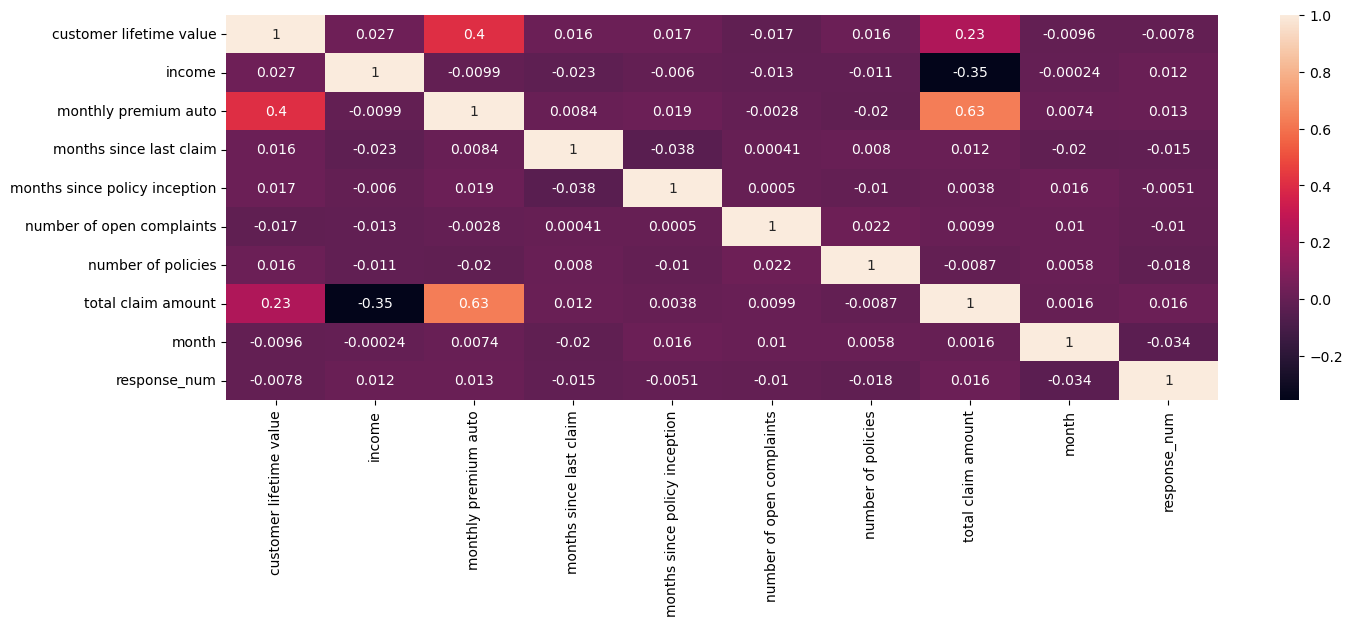

In [50]:
# displaying heatmap and the matrix of the collinearity (?) between the columns.
# rounding dataframe before displaying
correlations_matrix = data.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [51]:
correlations_matrix


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num
customer lifetime value,1.000000,0.027354,0.402617,0.015805,0.016709,-0.017078,0.016428,0.232583,-0.009607,-0.007828
income,0.027354,1.000000,-0.009929,-0.023094,-0.005992,-0.012843,-0.010831,-0.354613,-0.000239,0.011659
monthly premium auto,0.402617,-0.009929,1.000000,0.008350,0.019339,-0.002814,-0.020300,0.631372,0.007366,0.013457
months since last claim,0.015805,-0.023094,0.008350,1.000000,-0.037666,0.000405,0.008023,0.012316,-0.019588,-0.015126
months since policy inception,0.016709,-0.005992,0.019339,-0.037666,1.000000,0.000501,-0.010445,0.003780,0.016032,-0.005090
number of open complaints,-0.017078,-0.012843,-0.002814,0.000405,0.000501,1.000000,0.022275,0.009935,0.010174,-0.010140
number of policies,0.016428,-0.010831,-0.020300,0.008023,-0.010445,0.022275,1.000000,-0.008702,0.005792,-0.018431
total claim amount,0.232583,-0.354613,0.631372,0.012316,0.003780,0.009935,-0.008702,1.000000,0.001624,0.016232
month,-0.009607,-0.000239,0.007366,-0.019588,0.016032,0.010174,0.005792,0.001624,1.000000,-0.033588
response_num,-0.007828,0.011659,0.013457,-0.015126,-0.005090,-0.010140,-0.018431,0.016232,-0.033588,1.000000



# round 5

In [52]:
# importing
from sklearn.preprocessing import MinMaxScaler

In [53]:
# defining the y and X
y = data['total claim amount']
X = data.drop(['total claim amount'], axis=1)

In [54]:
# just checking both dataframes real quick
display(numerical.head(1))
display(categorical.head(1))

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num
0,4809.21696,48029,61,7.0,52,0.0,9,292.8,2,0


,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,not A


In [55]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
# making tool called transformer by fitting the numerical dataframe into the funct MinMaxScaler()
transformer = MinMaxScaler().fit(numerical)
# producing the "normalized" value, but dont produce the dataframe/series/list (yet)
x_normalized = transformer.transform(numerical)
print(x_normalized.shape)
# it needs to be made a dataframe first to see it in a better manner
x_normalized = pd.DataFrame(x_normalized, columns=numerical.columns)

(10873, 10)


In [56]:
# now we make the corellation dataframe for all the columns
# WE DONT NEED THIS ANYWHERE ELSE
data_corr = pd.DataFrame(x_normalized, columns=numerical.columns).corr()
# and round it a bit

In [57]:
# end of round 5

# round 6

In [58]:
from sklearn.preprocessing import OneHotEncoder
# making a mold for the onehot-function 
encoder = OneHotEncoder().fit(categorical)

In [59]:
# dropping these columns: customer, effective to date, response
try:
    categorical = categorical.drop(columns=["response","customer", "effective to date"], axis = 1)
    print("deleted columns 'response', 'customer', 'effective to date'")
except:
    print("columns 'response', 'customer', 'effective to date' are already deleted.")

deleted columns 'response', 'customer', 'effective to date'


In [60]:
# encoder = OneHotEncoder(drop='first').fit(categorical)
# i dont wanna drop the first, so

# making the mold by using categorical data as the default data
encoder = OneHotEncoder().fit(categorical)
# putting the mold to work for the categorical data (?), then make an array out of it
cat_encoded = encoder.transform(categorical).toarray()
# getting the column names
cols = encoder.get_feature_names_out(input_features=categorical.columns)
# turning it into dataframe
onehot_encoded = pd.DataFrame(cat_encoded,columns=cols)
onehot_encoded.head(1)

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,employment status_Disabled,employment status_Employed,employment status_Medical Leave,employment status_Retired,employment status_Unemployed,gender_F,gender_M,location code_Rural,location code_Suburban,location code_Urban,marital status_Divorced,marital status_Married,marital status_Single,policy type_Corporate Auto,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer1,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Agent,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small,vehicle type_A,vehicle type_not A
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [61]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X.head(1)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_num,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,employment status_Disabled,employment status_Employed,employment status_Medical Leave,employment status_Retired,employment status_Unemployed,gender_F,gender_M,location code_Rural,location code_Suburban,location code_Urban,marital status_Divorced,marital status_Married,marital status_Single,policy type_Corporate Auto,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer1,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Agent,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small,vehicle type_A,vehicle type_not A
0,0.035752,0.480381,0.0,0.2,0.525253,0.0,1.0,0.101171,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [62]:
# dropping irrelevant column(s)
try:
    X = X.drop(columns=["response_num","month"], axis = 1)
    print("deleted columns 'response_num', 'month'")
except:
    print("columns 'response_num', 'month' are already deleted.")

deleted columns 'response_num', 'month'


In [63]:
# separating y and X to train and test the machine (?)
y1 = X["total claim amount"]
X1 = X.drop(["total claim amount"], axis = 1)

In [64]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import time
import sys

In [77]:
estsize = []
r2_train_list = []
r2_test_list = []
mse_train_list = []
mse_test_list = []
rmse_train_list = []
rmse_test_list = []
mae_train_list = []
mae_test_list = []

lm = linear_model.LinearRegression()
for i in range(1,10):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=i/10, random_state=42)
    # fitting training model to LinearRegression, making a linear model
    lm.fit(X_train,y_train)
    # prediction values
    model = lm.predict(X_train)
    predict = lm.predict(X_test)
    # r2 values
    r2_train = lm.score(X_train, y_train)
    r2_test = lm.score(X_test, y_test)
    # mse values
    mse_train = mse(model, y_train)
    mse_test = mse(predict, y_test)
    # rmse values
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    # mae values
    mae_train = mae(model, y_train)
    mae_test = mae(predict, y_test)
    # appending to the lists
    testsize.append(i/10)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)
    
metrics1 = pd.DataFrame()
metrics1["test size 1"] = pd.DataFrame(testsize)
metrics1["R2 train 1"] = pd.DataFrame(r2_train_list)
metrics1["R2 test 1"] = pd.DataFrame(r2_test_list)
metrics1["MSE train 1"] = pd.DataFrame(mse_train_list)
metrics1["MSE test 1"] = pd.DataFrame(mse_test_list)
metrics1["RMSE train 1"] = pd.DataFrame(rmse_train_list)
metrics1["RMSE test 1"] = pd.DataFrame(rmse_test_list)
metrics1["MAE train 1"] = pd.DataFrame(mae_train_list)
metrics1["MAE test 1"] = pd.DataFrame(mae_test_list)

# fun snippet
blah = "\n\t\t\t\t  Calculating the metrics.\n"
for i in blah:
    sys.stdout.write(i)
    sys.stdout.flush()
    time.sleep(0.075)
print("\t\t\t\t       ", end = "")
for i in range(0,5):
    time.sleep(0.5)
    print(".", end = "  ")
    i+=1
time.sleep(1)
blah2 = "\n\n\t\t\tShowing metrics results for different test sizes."
for i in blah2:
    sys.stdout.write(i)
    sys.stdout.flush()
    time.sleep(0.075)
time.sleep(2)

#displaying result
display(metrics1)


				  Calculating the metrics.
				       .  .  .  .  .  

			Showing metrics results for different test sizes.

,test size 1,R2 train 1,R2 test 1,MSE train 1,MSE test 1,RMSE train 1,RMSE test 1,MAE train 1,MAE test 1
0,0.1,0.769257,0.779056,0.002357,0.002226,0.048552,0.047177,0.033131,0.032940
1,0.2,0.767594,0.779294,0.002367,0.002265,0.048653,0.047597,0.033113,0.033337
2,0.3,0.767436,0.775680,0.002354,0.002329,0.048522,0.048265,0.032915,0.033569
3,0.4,0.766334,0.774830,0.002415,0.002252,0.049145,0.047454,0.033215,0.033286
4,0.5,0.771531,0.766051,0.002325,0.002393,0.048213,0.048919,0.032927,0.033293
5,0.6,0.765697,0.770039,0.002386,0.002348,0.048848,0.048461,0.033188,0.032905
6,0.7,0.761951,0.769851,0.002394,0.002362,0.048924,0.048604,0.033557,0.033149
7,0.8,0.764418,0.765791,0.002335,0.002406,0.048323,0.049054,0.033078,0.033305
8,0.9,0.787104,0.757384,0.002046,0.002491,0.045230,0.049906,0.031924,0.033613


# round 7

In [66]:
# defining numerical and categorical for the 2nd attempt
numerical2 = pd.DataFrame(data.select_dtypes(np.number))
categorical2 = pd.DataFrame(data.select_dtypes(object))

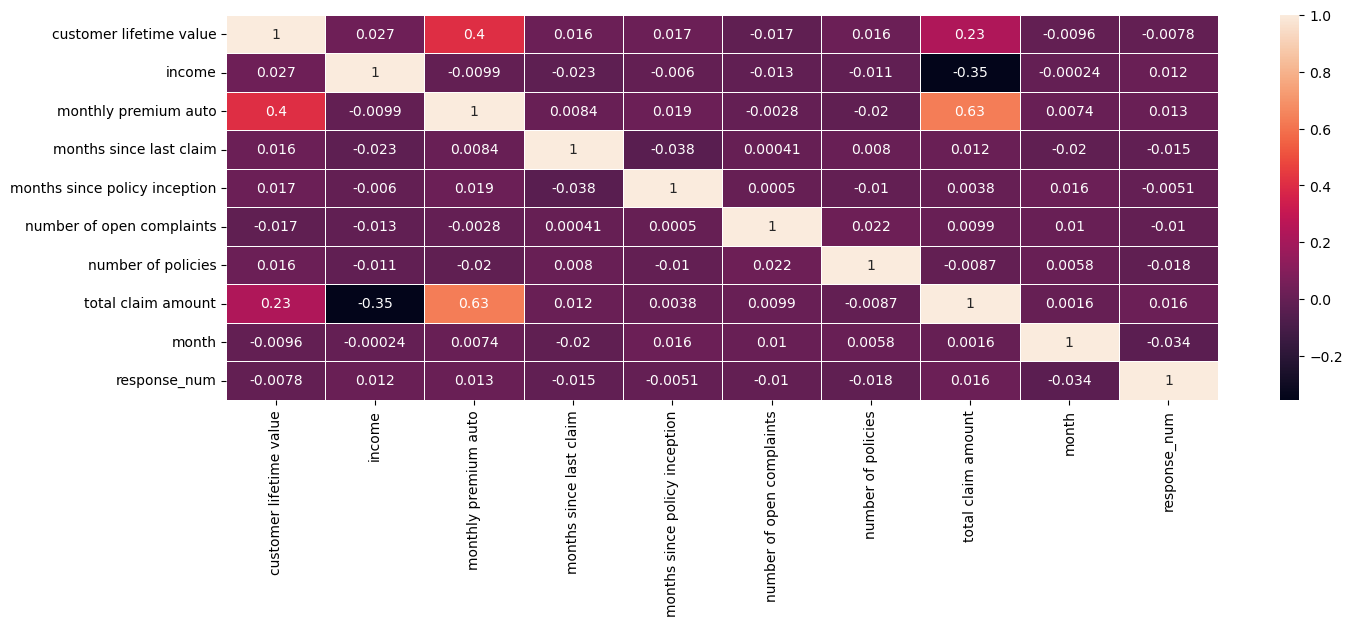

In [67]:
correlations_matrix2 = numerical2.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix2, annot=True, linewidth = .5)
plt.show()

In [68]:
# not sure if there are any insignificant values there, but
# these 3 columns have some low correlation values
numerical2 = numerical2.drop(["months since policy inception", "month", "number of open complaints"], axis = 1)

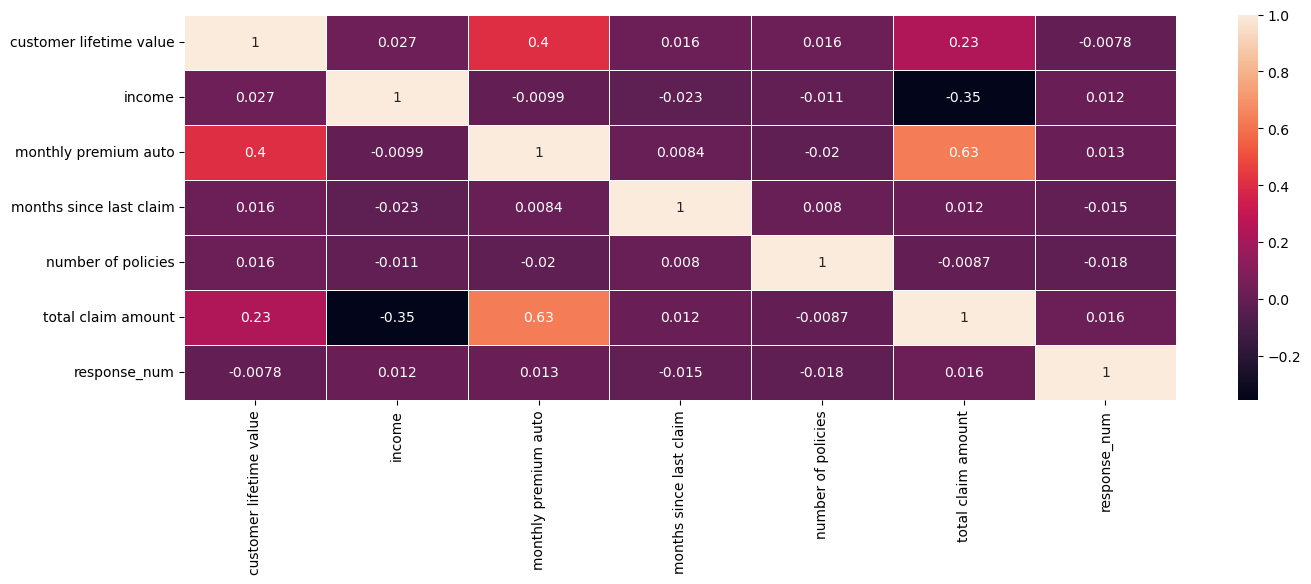

In [69]:
correlations_matrix2 = numerical2.corr()
# display(correlations_matrix)
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix2, annot=True, linewidth = .5)
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
transformer2 = StandardScaler().fit(numerical2)
x_standardized2 = transformer2.transform(numerical2)
print(x_standardized2.shape)
x_standardized2 = pd.DataFrame(x_standardized2, columns=numerical2.columns)

(10873, 7)


In [71]:
try:
    categorical2 = categorical2.drop(columns=["response"], axis = 1)
    print("deleted column 'response'")
except:
    print("column 'response' is already deleted.")
try:
    categorical2 = categorical2.drop(columns=["customer"], axis = 1)
    print("deleted column 'customer'")
except:
    print("column 'customer' is already deleted.")
try:
    categorical2 = categorical2.drop(columns=["effective to date"], axis = 1)
    print("deleted column 'effective to date'")
except:
    print("column 'effective to date' is already deleted.")

deleted column 'response'
deleted column 'customer'
deleted column 'effective to date'


In [72]:

encoder2 = OneHotEncoder().fit(categorical2)
print(encoder2.categories_)
cat_encoded2 = encoder2.transform(categorical2).toarray()
print(cat_encoded2)
cols2 = encoder2.get_feature_names_out(input_features=categorical2.columns)
onehot_encoded2 = pd.DataFrame(cat_encoded2,columns=cols2)
onehot_encoded2.head(5)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), array(['Large', 'Medsize', 'Small'], d

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,employment status_Disabled,employment status_Employed,employment status_Medical Leave,employment status_Retired,employment status_Unemployed,gender_F,gender_M,location code_Rural,location code_Suburban,location code_Urban,marital status_Divorced,marital status_Married,marital status_Single,policy type_Corporate Auto,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer1,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Agent,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small,vehicle type_A,vehicle type_not A
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
# dropping irrelevant column(s)
try:
    X2 = X2.drop(columns=["response_num"], axis = 1)
    print("deleted column 'response_num'")
except:
    print("column 'response_num' is already deleted.")
try:
    X2 = X2.drop(columns=["month"], axis = 1)
    print("deleted columns'month'")
except:
    print("column 'month' is already deleted.")

column 'response_num' is already deleted.
column 'month' is already deleted.


In [81]:
# separating y and X to train and test the machine (?)
y2 = X2["total claim amount"]
X2 = X2.drop(["total claim amount"], axis = 1)

NameError: name 'X2' is not defined

In [75]:
testsize = []
r2_train_list = []
r2_test_list = []
mse_train_list = []
mse_test_list = []
rmse_train_list = []
rmse_test_list = []
mae_train_list = []
mae_test_list = []

lm = linear_model.LinearRegression()
for i in range(1,10):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=i/10, random_state=42)
    # fitting training model to LinearRegression, making a linear model
    lm.fit(X_train,y_train)
    # prediction values
    model = lm.predict(X_train)
    predict = lm.predict(X_test)
    # r2 values
    r2_train = lm.score(X_train, y_train)
    r2_test = lm.score(X_test, y_test)
    # mse values
    mse_train = mse(model, y_train)
    mse_test = mse(predict, y_test)
    # rmse values
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    # mae values
    mae_train = mae(model, y_train)
    mae_test = mae(predict, y_test)
    # appending to the lists
    testsize.append(i/10)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)
    
metrics2 = pd.DataFrame()
metrics2["test size 2"] = pd.DataFrame(testsize)
metrics2["R2 train 2"] = pd.DataFrame(r2_train_list)
metrics2["R2 test 2"] = pd.DataFrame(r2_test_list)
metrics2["MSE train 2"] = pd.DataFrame(mse_train_list)
metrics2["MSE test 2"] = pd.DataFrame(mse_test_list)
metrics2["RMSE train 2"] = pd.DataFrame(rmse_train_list)
metrics2["RMSE test 2"] = pd.DataFrame(rmse_test_list)
metrics2["MAE train 2"] = pd.DataFrame(mae_train_list)
metrics2["MAE test 2"] = pd.DataFrame(mae_test_list)

# fun snippet
blah = "\n\t\t\t\t  Calculating the metrics.\n"
for i in blah:
    sys.stdout.write(i)
    sys.stdout.flush()
    time.sleep(0.075)
print("\t\t\t\t       ", end = "")
for i in range(0,5):
    time.sleep(0.5)
    print(".", end = "  ")
    i+=1
time.sleep(1)
blah2 = "\n\n\t\t\tShowing metrics results for different test sizes."
for i in blah2:
    sys.stdout.write(i)
    sys.stdout.flush()
    time.sleep(0.075)
time.sleep(2)

#displaying result
display(metrics2)

NameError: name 'X2' is not defined